In [8]:
import os
import import_ipynb
from sklearn.preprocessing import StandardScaler

from utils.mnist_reader import load_mnist
import matplotlib.pyplot as plt
import numpy as np

# os.chdir("models")
# # %run knn.ipynb
# from knn import KNNModel
# os.chdir("..")
print("curr path", os.getcwd())


curr path /Users/zackeryhe/Desktop/sophomore/cs178/178-final


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test,  y_test  = load_mnist('data/fashion', kind='t10k')


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

r1 = classification_report(y_test, knn.predict(X_test), target_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], output_dict=True)
print(r1)

{'T-shirt/top': {'precision': 0.741991341991342, 'recall': 0.857, 'f1-score': 0.7953596287703016, 'support': 1000.0}, 'Trouser': {'precision': 0.9857723577235772, 'recall': 0.97, 'f1-score': 0.9778225806451613, 'support': 1000.0}, 'Pullover': {'precision': 0.7304507819687213, 'recall': 0.794, 'f1-score': 0.7609008145663632, 'support': 1000.0}, 'Dress': {'precision': 0.9007391763463569, 'recall': 0.853, 'f1-score': 0.8762198253723678, 'support': 1000.0}, 'Coat': {'precision': 0.7817418677859391, 'recall': 0.745, 'f1-score': 0.7629288274449565, 'support': 1000.0}, 'Sandal': {'precision': 0.9793103448275862, 'recall': 0.852, 'f1-score': 0.9112299465240642, 'support': 1000.0}, 'Shirt': {'precision': 0.6360691144708424, 'recall': 0.589, 'f1-score': 0.6116303219106958, 'support': 1000.0}, 'Sneaker': {'precision': 0.8896164639850327, 'recall': 0.951, 'f1-score': 0.9192846785886902, 'support': 1000.0}, 'Bag': {'precision': 0.9840595111583422, 'recall': 0.926, 'f1-score': 0.9541473467284904, 's

In [9]:
def scale_data(X_tr: np.array, X_te: np.array) -> tuple[np.array, np.array]:
    scaler_tr = StandardScaler()
    
    scaler_tr.fit(X_tr)

    X_tr_scaled = scaler_tr.transform(X_tr)
    X_te_scaled= scaler_tr.transform(X_te)
    return X_tr_scaled, X_te_scaled

In [10]:
from sklearn.linear_model import LogisticRegression


X_train, y_train = load_mnist('data/fashion', kind='train')
X_test,  y_test  = load_mnist('data/fashion', kind='t10k')
X_tr_scaled, X_te_scaled = scale_data(X_train, X_test)
best_model = LogisticRegression(max_iter=1500, C=0.3,random_state=1234, solver="saga")
best_model.fit(X_tr_scaled, y_train)

/Users/zackeryhe/Desktop/sophomore/cs178/178-final/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.3, max_iter=1500, random_state=1234, solver='saga')

In [11]:
y_pred = best_model.predict(X_te_scaled)



r2 = classification_report(y_test, y_pred, target_names=["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"],
                                            output_dict=True)
print(r2)

{'T-shirt/top': {'precision': 0.8057768924302788, 'recall': 0.809, 'f1-score': 0.8073852295409182, 'support': 1000.0}, 'Trouser': {'precision': 0.9726443768996961, 'recall': 0.96, 'f1-score': 0.9662808253648717, 'support': 1000.0}, 'Pullover': {'precision': 0.7277227722772277, 'recall': 0.735, 'f1-score': 0.7313432835820896, 'support': 1000.0}, 'Dress': {'precision': 0.8318840579710145, 'recall': 0.861, 'f1-score': 0.8461916461916462, 'support': 1000.0}, 'Coat': {'precision': 0.7368421052631579, 'recall': 0.756, 'f1-score': 0.7462981243830207, 'support': 1000.0}, 'Sandal': {'precision': 0.9415384615384615, 'recall': 0.918, 'f1-score': 0.929620253164557, 'support': 1000.0}, 'Shirt': {'precision': 0.625, 'recall': 0.575, 'f1-score': 0.5989583333333334, 'support': 1000.0}, 'Sneaker': {'precision': 0.9028846153846154, 'recall': 0.939, 'f1-score': 0.9205882352941176, 'support': 1000.0}, 'Bag': {'precision': 0.9280719280719281, 'recall': 0.929, 'f1-score': 0.928535732133933, 'support': 1000.

In [12]:
from sklearn.neural_network import MLPClassifier

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test,  y_test  = load_mnist('data/fashion', kind='t10k')
X_tr_scaled, X_te_scaled = scale_data(X_train, X_test)

model = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='sgd', alpha=0.0001, batch_size=256, learning_rate='constant', learning_rate_init=0.01, max_iter=500, shuffle=True, random_state=1234, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=100, max_fun=15000)
model.fit(X_tr_scaled, y_train)

r3 = classification_report(y_test, model.predict(X_te_scaled), target_names=["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"],
                                            output_dict=True)
print(r3)

{'T-shirt/top': {'precision': 0.8215353938185443, 'recall': 0.824, 'f1-score': 0.8227658512231653, 'support': 1000.0}, 'Trouser': {'precision': 0.9908256880733946, 'recall': 0.972, 'f1-score': 0.9813225643614336, 'support': 1000.0}, 'Pullover': {'precision': 0.8071928071928072, 'recall': 0.808, 'f1-score': 0.8075962018990505, 'support': 1000.0}, 'Dress': {'precision': 0.875, 'recall': 0.896, 'f1-score': 0.8853754940711462, 'support': 1000.0}, 'Coat': {'precision': 0.8208208208208209, 'recall': 0.82, 'f1-score': 0.8204102051025512, 'support': 1000.0}, 'Sandal': {'precision': 0.958502024291498, 'recall': 0.947, 'f1-score': 0.9527162977867203, 'support': 1000.0}, 'Shirt': {'precision': 0.6977687626774848, 'recall': 0.688, 'f1-score': 0.6928499496475328, 'support': 1000.0}, 'Sneaker': {'precision': 0.9436201780415431, 'recall': 0.954, 'f1-score': 0.9487817006464445, 'support': 1000.0}, 'Bag': {'precision': 0.963819095477387, 'recall': 0.959, 'f1-score': 0.9614035087719298, 'support': 1000.

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test,  y_test  = load_mnist('data/fashion', kind='t10k')

frac = 0.01
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train,
    train_size=frac,
    stratify=y_train,
    random_state=1234
)

X_tr_scaled, X_te_scaled = scale_data(X_sub, X_test)

model = svm.SVC(kernel='linear', random_state=1234)
model.fit(X_tr_scaled, y_sub)
r4 = classification_report(y_test, model.predict(X_te_scaled), target_names=["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"],
                                            output_dict=True)
print(r4)

{'T-shirt/top': {'precision': 0.6656775469831849, 'recall': 0.673, 'f1-score': 0.6693187468920935, 'support': 1000.0}, 'Trouser': {'precision': 0.9706190975865687, 'recall': 0.925, 'f1-score': 0.9472606246799795, 'support': 1000.0}, 'Pullover': {'precision': 0.6038562664329535, 'recall': 0.689, 'f1-score': 0.6436244745446054, 'support': 1000.0}, 'Dress': {'precision': 0.7965056526207606, 'recall': 0.775, 'f1-score': 0.7856056766345666, 'support': 1000.0}, 'Coat': {'precision': 0.6528835690968444, 'recall': 0.6, 'f1-score': 0.6253256904637832, 'support': 1000.0}, 'Sandal': {'precision': 0.8478260869565217, 'recall': 0.819, 'f1-score': 0.8331637843336724, 'support': 1000.0}, 'Shirt': {'precision': 0.4568627450980392, 'recall': 0.466, 'f1-score': 0.4613861386138614, 'support': 1000.0}, 'Sneaker': {'precision': 0.8277268093781855, 'recall': 0.812, 'f1-score': 0.8197879858657244, 'support': 1000.0}, 'Bag': {'precision': 0.9515279241306639, 'recall': 0.903, 'f1-score': 0.926629040533607, 'su

In [18]:
def plot_multiple_classification_reports(report_dicts, class_names, figsize=(12, 8)):
    metrics = ["precision", "recall", "f1-score"]
    n_metrics = len(metrics)
    n_models = len(report_dicts)
    n_classes = len(class_names)
    x = np.arange(n_classes)

    fig, axes = plt.subplots(n_metrics, 1, figsize=figsize, sharex=True)

    # If there's only one model, axes might be a single Axes object; force it into a list
    if n_metrics == 1:
        axes = [axes]

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        for model_name, report in report_dicts.items():
            # Collect the metric value for each class in the given order
            values = [report[c][metric] for c in class_names]
            ax.plot(
                x,
                values,
                marker="o",
                label=model_name
            )

        ax.set_ylim(0.0, 1.0)
        ax.set_ylabel(metric.capitalize(), fontsize=10)
        ax.grid(alpha=0.3)

        if idx == 0:
            ax.set_title("Comparison of Classification Metrics by Model", fontsize=12)
        if idx == n_metrics - 1:
            ax.set_xlabel("Class", fontsize=10)

        ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=max(1, n_models), fontsize=9)

    # Set x‐ticks only on the bottom subplot
    axes[-1].set_xticks(x)
    axes[-1].set_xticklabels(class_names, rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0],  28, 28, 1)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42
)

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=2
)

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

r5 = classification_report(y_test, y_pred, target_names=["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
                                                        "Shirt", "Sneaker", "Bag", "Ankle boot"],
                                            output_dict=True)
print(r5)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/Users/zackeryhe/Desktop/sophomore/cs178/178-final/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 - 11s - 15ms/step - accuracy: 0.7660 - loss: 0.6421 - val_accuracy: 0.8564 - val_loss: 0.3861
Epoch 2/10
750/750 - 11s - 14ms/step - accuracy: 0.8580 - loss: 0.3963 - val_accuracy: 0.8791 - val_loss: 0.3257
Epoch 3/10
750/750 - 11s - 15ms/step - accuracy: 0.8795 - loss: 0.3371 - val_accuracy: 0.8907 - val_loss: 0.2964
Epoch 4/10
750/750 - 10s - 13ms/step - accuracy: 0.8921 - loss: 0.3039 - val_accuracy: 0.8939 - val_loss: 0.2833
Epoch 5/10
750/750 - 9s - 12ms/step - accuracy: 0.9009 - loss: 0.2740 - val_accuracy: 0.9015 - val_loss: 0.2683
Epoch 6/10
750/750 - 9s - 12ms/step - accuracy: 0.9070 - loss: 0.2530 - val_accuracy: 0.9057 - val_loss: 0.2490
Epoch 7/10
750/750 - 10s - 14ms/step - accuracy: 0.9147 - loss: 0.2337 - val_accuracy: 0.9105 - val_loss: 0.2503
Epoch 8/10
750/750 - 10s - 14ms/step - accuracy: 0.9219 - loss: 0.2173 - val_accuracy: 0.9068 - val_loss: 0.2447
Epoch 9/10
750/750 - 10s - 14ms/step - accuracy: 0.9255 - loss: 0.2037 - val_accuracy: 0.9098 - val_loss: 0.2

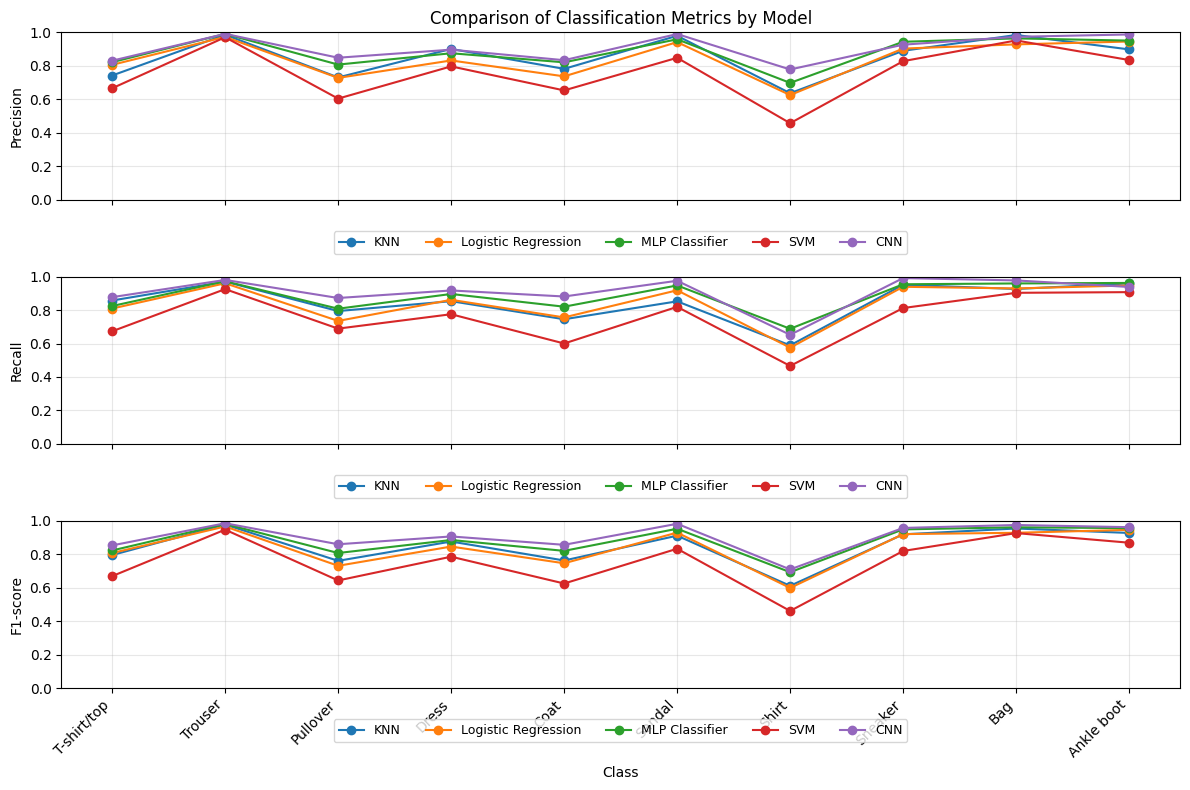

In [19]:
report_dicts = {
    "KNN": r1,
    "Logistic Regression": r2,
    "MLP Classifier": r3,
    "SVM": r4,
    "CNN": r5
}
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plot_multiple_classification_reports(report_dicts, class_names)